In [10]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [99]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [101]:
df.isnull().sum()

# df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [103]:
num_of_rows, num_of_columns = df.shape
print(f"This is the number of rows: {num_of_rows}, and this is the number of columns: {num_of_columns}")

This is the number of rows: 344, and this is the number of columns: 7


In [105]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


# 1

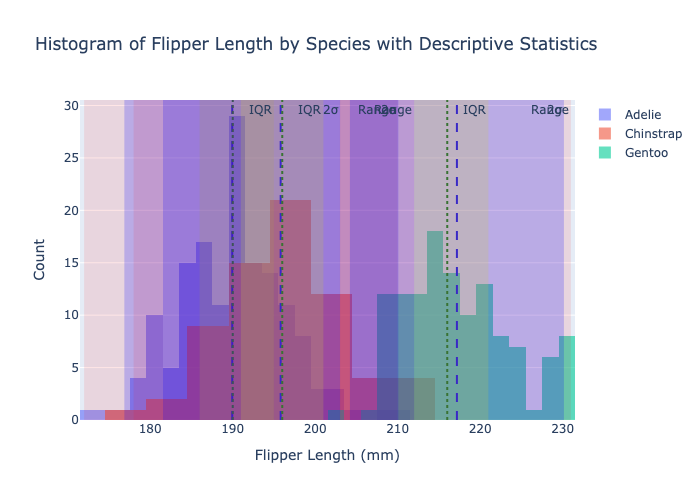

In [108]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# Remove rows with missing values in flipper_length_mm
df = df.dropna(subset=['flipper_length_mm'])

# Create a list to hold the individual plots
species_list = df['species'].unique()
fig = go.Figure()

# Iterate through each species
for species in species_list:
    species_data = df[df['species'] == species]['flipper_length_mm']
    
    # Descriptive statistics
    mean_flipper = species_data.mean()
    median_flipper = species_data.median()
    min_flipper = species_data.min()
    max_flipper = species_data.max()
    q1 = species_data.quantile(0.25)
    q3 = species_data.quantile(0.75)
    std_dev = species_data.std()
    lower_2std = mean_flipper - 2 * std_dev
    upper_2std = mean_flipper + 2 * std_dev
    
    # Add a histogram for the species
    fig.add_trace(go.Histogram(
        x=species_data,
        name=species,
        opacity=0.6
    ))
    
    # Add vertical lines for mean and median
    fig.add_vline(x=mean_flipper, line=dict(color='blue', dash='dash'), name=f'{species} Mean')
    fig.add_vline(x=median_flipper, line=dict(color='green', dash='dot'), name=f'{species} Median')
    
    # Add rectangles for the range, IQR, and ±2 std deviation range
    fig.add_vrect(x0=min_flipper, x1=max_flipper, line_width=0, fillcolor='red', opacity=0.1, annotation_text='Range')
    fig.add_vrect(x0=q1, x1=q3, line_width=0, fillcolor='yellow', opacity=0.2, annotation_text='IQR')
    fig.add_vrect(x0=lower_2std, x1=upper_2std, line_width=0, fillcolor='blue', opacity=0.2, annotation_text='2σ')

# Update layout
fig.update_layout(
    title="Histogram of Flipper Length by Species with Descriptive Statistics",
    xaxis_title="Flipper Length (mm)",
    yaxis_title="Count",
    barmode='overlay'
)

fig.show(renderer="png")


In [20]:
species_list = df['species'].unique()

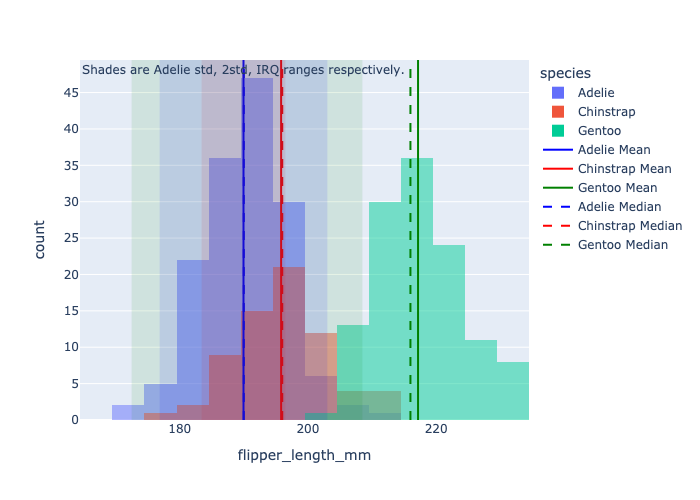

In [98]:
fig = px.histogram(df, x='flipper_length_mm', color='species', barmode='overlay', nbins=20)

# Mean flipper_length
adelie_mean = df[df['species'] == 'Adelie']['flipper_length_mm'].mean()
chinstrap_mean = df[df['species'] == 'Chinstrap']['flipper_length_mm'].mean()
gentoo_mean = df[df['species'] == 'Gentoo']['flipper_length_mm'].mean()
fig.add_vline(x=adelie_mean, line=dict(color='blue', dash='solid'))
fig.add_vline(x=chinstrap_mean, line=dict(color='red', dash='solid'))
fig.add_vline(x=gentoo_mean, line=dict(color='green', dash='solid'))

fig.add_trace(go.Scatter(
    x=[None], 
    y=[None], 
    mode='lines', 
    line=dict(color='blue', dash='solid'), 
    name='Adelie Mean'
))

fig.add_trace(go.Scatter(
    x=[None], y=[None], 
    mode='lines', 
    line=dict(color='red', dash='solid'), 
    name='Chinstrap Mean'
))

fig.add_trace(go.Scatter(
    x=[None], y=[None], 
    mode='lines', 
    line=dict(color='green', dash='solid'), 
    name='Gentoo Mean'
))

# Median flipper_length
adelie_median = df[df['species'] == 'Adelie']['flipper_length_mm'].median()
chinstrap_median = x=df[df['species'] == 'Chinstrap']['flipper_length_mm'].median()
gentoo_median = x=df[df['species'] == 'Gentoo']['flipper_length_mm'].median()
fig.add_vline(x=adelie_median, line=dict(color='blue', dash='dash'))
fig.add_vline(x=chinstrap_median, line=dict(color='red', dash='dash'))
fig.add_vline(x=gentoo_median, line=dict(color='green', dash='dash'))

fig.add_trace(go.Scatter(
    x=[None], y=[None], 
    mode='lines', 
    line=dict(color='blue', dash='dash'), 
    name='Adelie Median'
))

fig.add_trace(go.Scatter(
    x=[None], y=[None], 
    mode='lines', 
    line=dict(color='red', dash='dash'), 
    name='Chinstrap Median'
))

fig.add_trace(go.Scatter(
    x=[None], y=[None], 
    mode='lines', 
    line=dict(color='green', dash='dash'), 
    name='Gentoo Median'
))

# STD
adelie_std = df[df['species'] == 'Adelie']['flipper_length_mm'].std()
chinstrap_std = df[df['species'] == 'Chinstrap']['flipper_length_mm'].std()
gentoo_std = df[df['species'] == 'Gentoo']['flipper_length_mm'].std()

# Standard deviation range only for Adelie
adelie_lower_bound_std_range = adelie_mean - (adelie_std)
adelie_upper_bound_std_range = adelie_mean + (adelie_std)
fig.add_vrect(x0=adelie_lower_bound_std_range, x1=adelie_upper_bound_std_range, line_width=0, fillcolor='red', opacity=0.1)


# # Interquartile range, only for Adelie
adelie_25percentile = df[df['species'] == 'Adelie']['flipper_length_mm'].quantile(0.25)
adelie_75percentile = df[df['species'] == 'Adelie']['flipper_length_mm'].quantile(0.75)
IQR = adelie_75percentile - adelie_25percentile

adelie_lower_bound_IQR_range = adelie_25percentile - (1.5 * IQR)
adelie_upper_bound_IQR_range = adelie_75percentile + (1.5 * IQR)

fig.add_vrect(x0=adelie_lower_bound_IQR_range, x1=adelie_upper_bound_IQR_range, line_width=0, fillcolor='green', opacity=0.1)

# 2 Standard Deviation range
adelie_lower_bound_2std_range = adelie_mean - (2 * adelie_std)
adelie_upper_bound_2std_range = adelie_mean + (2 * adelie_std)
fig.add_vrect(x0=adelie_lower_bound_2std_range, x1=adelie_upper_bound_2std_range, line_width=0, fillcolor='blue', opacity=0.1, annotation_text='Shades are Adelie std, 2std, IRQ ranges respectively.', annotation_position="top")

overall_mean = df['flipper_length_mm'].mean()
overall_median = df['flipper_length_mm'].median()
overall_std = df['flipper_length_mm'].std()

fig.show(renderer="png")

Only shows the ranges for one species, or the colours would begin to overlap and the graph would become busy. 
Unlcear what the rectangles are representing, there is no legend feature, would have to improvise. 
Could have shown the ranges of flippers for all the species combined. 

In [68]:
# Count the number of Chinstrap penguins with a flipper length between 185 mm and 195 mm
chinstrap_count_185_195 = df[(df['species'] == 'Chinstrap') & (df['flipper_length_mm'] >= 185) & (df['flipper_length_mm'] <= 195)].shape[0]
print('Count of Chinstrap penguins with flipper length between 190 mm and 120 mm:', chinstrap_count_185_195)

Count of Chinstrap penguins with flipper length between 185 mm and 195 mm: 30


In [100]:
# Calculate the minimum and maximum flipper lengths
min_flipper_length = df['flipper_length_mm'].min()
max_flipper_length = df['flipper_length_mm'].max()

print('Minimum flipper length:', min_flipper_length)
print('Maximum flipper length:', max_flipper_length)

Minimum flipper length: 172.0
Maximum flipper length: 231.0


In [52]:
# Count the occurrences of flipper lengths for each species
species_counts = df.groupby('species')['flipper_length_mm'].count()

# Print the counts
print(species_counts)

species
Adelie       151
Chinstrap     68
Gentoo       123
Name: flipper_length_mm, dtype: int64


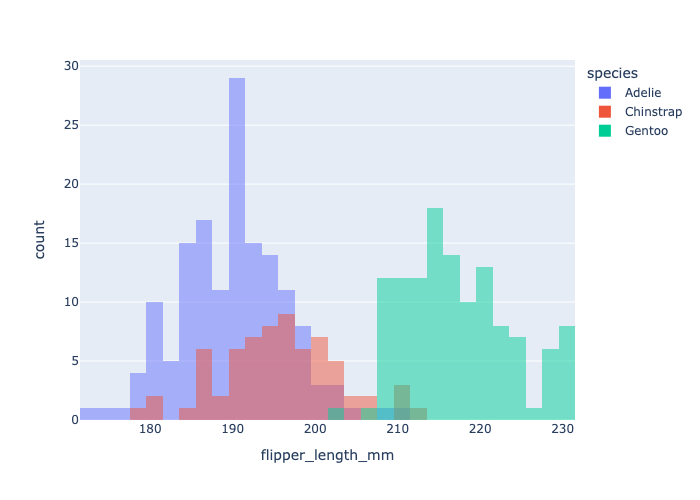

In [82]:
# Create separate histograms for each species
fig = px.histogram(df, x='flipper_length_mm', color='species', barmode='overlay', nbins=30)
fig.show(renderer="png")

# 2

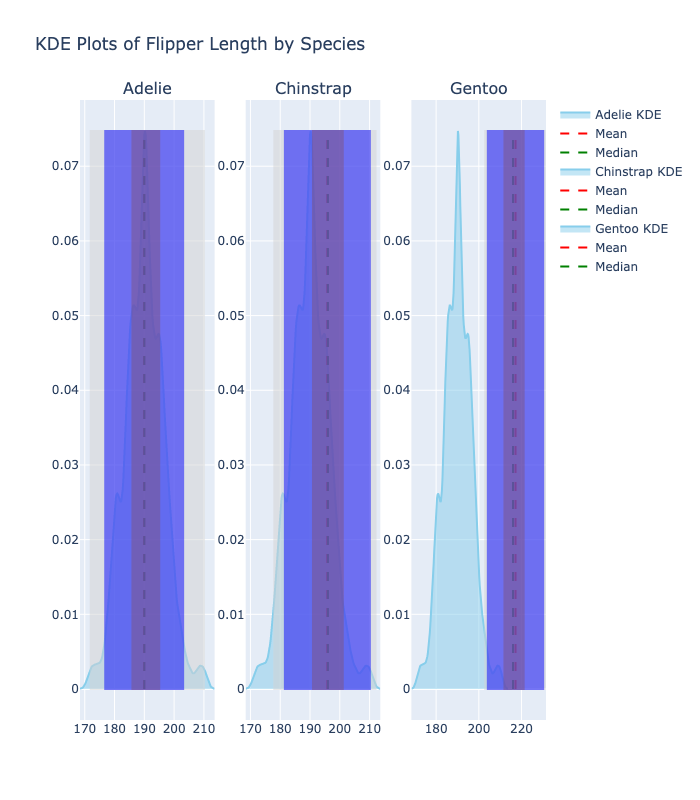

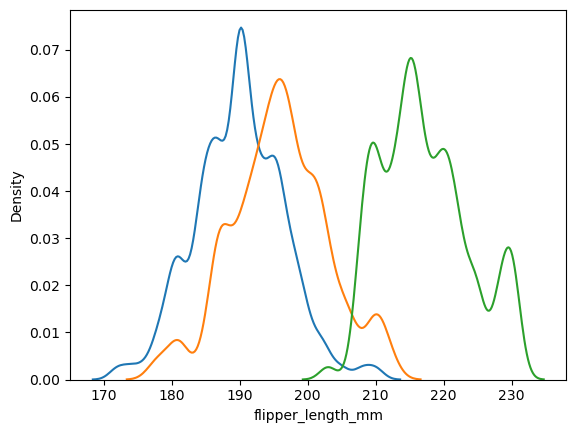

In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# Set up the figure with subplots
species = df['species'].unique()
num_species = len(species)
fig = make_subplots(rows=(num_species // 3) + (num_species % 3 > 0), cols=3, 
                    subplot_titles=species)

# Iterate over species to create KDE plots
for i, sp in enumerate(species):
    row = i // 3 + 1
    col = i % 3 + 1

    # Filter data for the specific species
    data = df[df['species'] == sp]['flipper_length_mm']
    
    # Calculate statistics
    mean_value = data.mean()
    median_value = data.median()
    min_value = data.min()
    max_value = data.max()
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    std_dev = data.std()
    lower_bound = mean_value - 2 * std_dev
    upper_bound = mean_value + 2 * std_dev

    # Create a KDE plot using Seaborn and convert to Plotly figure
    kde_data = sns.kdeplot(data, bw_adjust=0.5).get_lines()[0].get_data()
    
    # Add the KDE plot to the subplot
    fig.add_trace(go.Scatter(x=kde_data[0], y=kde_data[1], fill='tozeroy', 
                             mode='lines', name=f'{sp} KDE', line=dict(color='skyblue')),
                  row=row, col=col)

    # Add mean and median lines
    fig.add_trace(go.Scatter(x=[mean_value, mean_value], y=[0, max(kde_data[1])], 
                             mode='lines', line=dict(color='red', dash='dash'), name='Mean'),
                  row=row, col=col)
    
    fig.add_trace(go.Scatter(x=[median_value, median_value], y=[0, max(kde_data[1])], 
                             mode='lines', line=dict(color='green', dash='dash'), name='Median'),
                  row=row, col=col)

    # Add vertical rectangles for range and IQR
    fig.add_shape(type="rect", x0=min_value, x1=max_value, y0=0, y1=max(kde_data[1]), 
                  line=dict(color='lightgray'), fillcolor='lightgray', opacity=0.5,
                  row=row, col=col)
    
    fig.add_shape(type="rect", x0=q1, x1=q3, y0=0, y1=max(kde_data[1]), 
                  line=dict(color='orange'), fillcolor='orange', opacity=0.5,
                  row=row, col=col)
    
    fig.add_shape(type="rect", x0=lower_bound, x1=upper_bound, y0=0, y1=max(kde_data[1]), 
                  line=dict(color='blue'), fillcolor='blue', opacity=0.5,
                  row=row, col=col)

# Update layout
fig.update_layout(title_text='KDE Plots of Flipper Length by Species', height=800)

# Show the figure
fig.show(renderer="png")


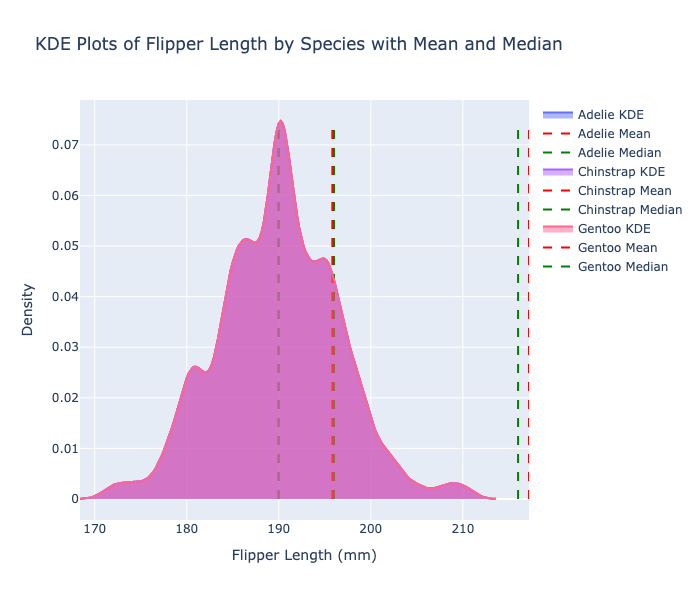

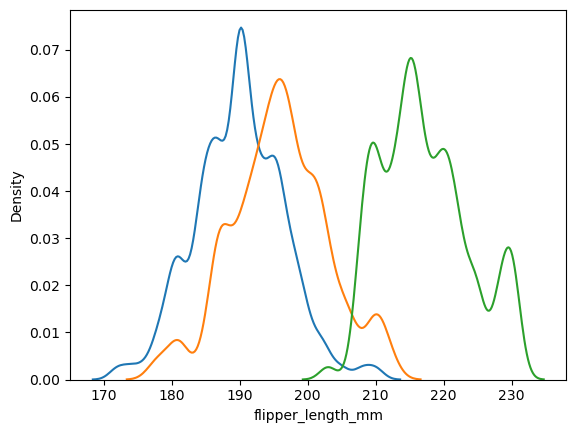

In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as go

# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# Set up the figure
fig = go.Figure()

# Iterate over species to create KDE plots
species = df['species'].unique()

for sp in species:
    # Filter data for the specific species
    data = df[df['species'] == sp]['flipper_length_mm']
    
    # Calculate statistics
    mean_value = data.mean()
    median_value = data.median()
    
    # Create a KDE plot using Seaborn and convert to Plotly figure
    kde_data = sns.kdeplot(data, bw_adjust=0.5).get_lines()[0].get_data()
    
    # Add the KDE plot to the figure
    fig.add_trace(go.Scatter(x=kde_data[0], y=kde_data[1], fill='tozeroy', 
                             mode='lines', name=f'{sp} KDE', line=dict(width=2)))

    # Add mean and median lines
    fig.add_trace(go.Scatter(x=[mean_value, mean_value], y=[0, max(kde_data[1])], 
                             mode='lines', line=dict(color='red', dash='dash'), name=f'{sp} Mean'))
    
    fig.add_trace(go.Scatter(x=[median_value, median_value], y=[0, max(kde_data[1])], 
                             mode='lines', line=dict(color='green', dash='dash'), name=f'{sp} Median'))

# Update layout
fig.update_layout(title_text='KDE Plots of Flipper Length by Species with Mean and Median', 
                  xaxis_title='Flipper Length (mm)', 
                  yaxis_title='Density', 
                  height=600)

# Show the figure
fig.show(renderer="png")


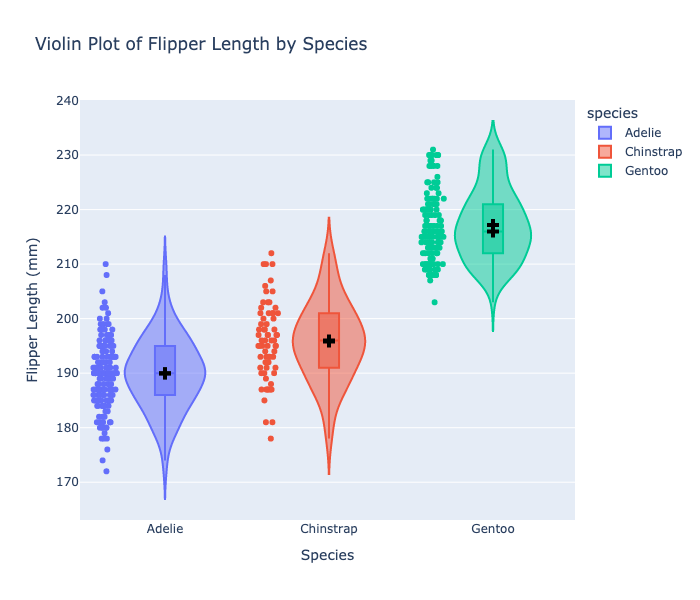

In [118]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# Create a violin plot using Plotly Express
fig = px.violin(df, x='species', y='flipper_length_mm', color='species', 
                 box=True, points="all", 
                 title='Violin Plot of Flipper Length by Species')

# Calculate means and medians
mean_medians = df.groupby('species')['flipper_length_mm'].agg(['mean', 'median']).reset_index()

# Add mean and median points to the plot
for index, row in mean_medians.iterrows():
    fig.add_trace(go.Scatter(x=[row['species'], row['species']], 
                             y=[row['mean'], row['median']], 
                             mode='markers', 
                             marker=dict(size=10, color='black', symbol='cross'),
                             name=f"{row['species']} Mean & Median",
                             showlegend=False))

# Update layout for better visualization
fig.update_layout(xaxis_title='Species',
                  yaxis_title='Flipper Length (mm)',
                  height=600)

# Show the figure
fig.show(renderer="png")


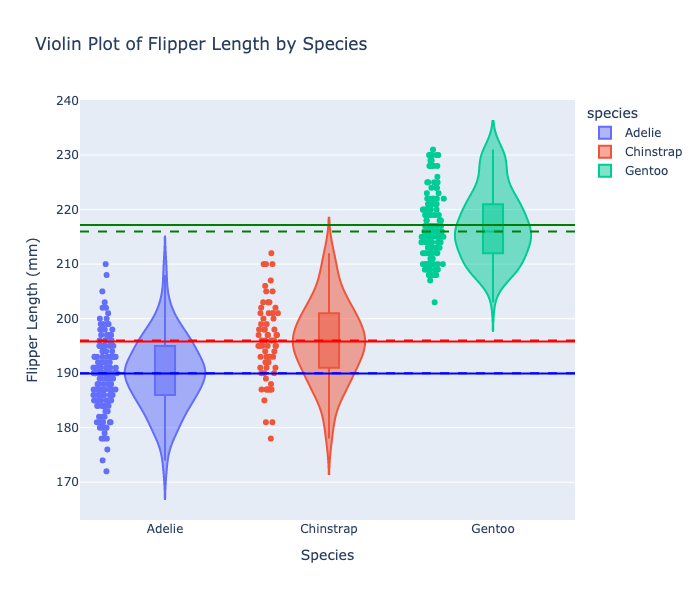

In [119]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# Create a violin plot using Plotly Express
fig = px.violin(df, x='species', y='flipper_length_mm', color='species', 
                 box=True, points="all", 
                 title='Violin Plot of Flipper Length by Species')

# Calculate means, medians, and modes
summary_stats = df.groupby('species')['flipper_length_mm'].agg(['mean', 'median', lambda x: x.mode()[0]]).reset_index()
summary_stats.columns = ['species', 'mean', 'median', 'mode']

# Define colors for median and mode lines
color_mapping = {
    'Adelie': {'median': 'blue', 'mode': 'blue'},
    'Chinstrap': {'median': 'red', 'mode': 'red'},
    'Gentoo': {'median': 'green', 'mode': 'green'}
}

# Add mean, median, and mode lines to the plot
for index, row in summary_stats.iterrows():
    # Add mean line (solid)
    fig.add_hline(y=row['mean'], line_color=color_mapping[row['species']]['median'], line_dash='solid', 
                   name=f"{row['species']} Mean")
    
    # Add median line (color-coded)
    fig.add_hline(y=row['median'], line_color=color_mapping[row['species']]['median'], line_dash='dash', 
                   name=f"{row['species']} Median")

# Update layout for better visualization
fig.update_layout(xaxis_title='Species',
                  yaxis_title='Flipper Length (mm)',
                  height=600)

# Show the figure
fig.show(renderer="png")


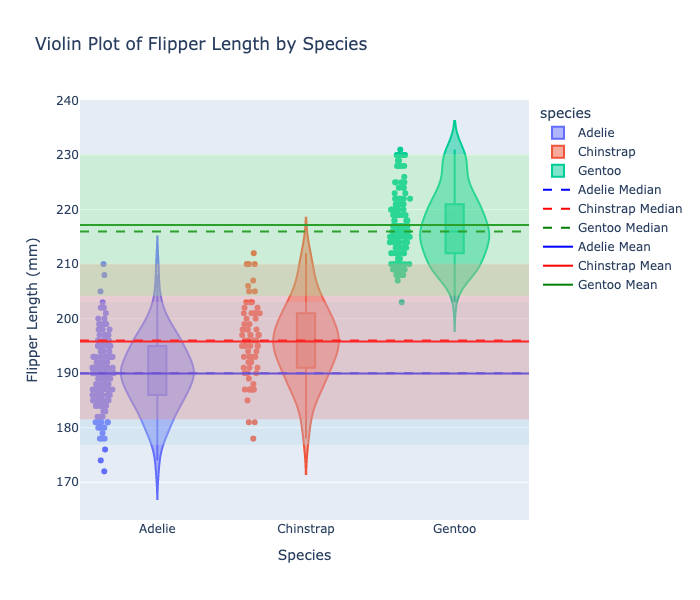

In [120]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# Create a violin plot using Plotly Express
fig = px.violin(df, x='species', y='flipper_length_mm', color='species', 
                 box=True, points="all", 
                 title='Violin Plot of Flipper Length by Species')

# Calculate means, medians, and modes
summary_stats = df.groupby('species')['flipper_length_mm'].agg(['mean', 'median', lambda x: x.mode()[0], 'std']).reset_index()
summary_stats.columns = ['species', 'mean', 'median', 'mode', 'std']

# Define colors for median and mode lines, and for the 2nd standard deviation ranges
color_mapping = {
    'Adelie': {'median': 'blue', 'std_range': 'lightblue'},
    'Chinstrap': {'median': 'red', 'std_range': 'lightcoral'},
    'Gentoo': {'median': 'green', 'std_range': 'lightgreen'}
}

# Add mean, median, and mode lines to the plot and 2nd standard deviation ranges
for index, row in summary_stats.iterrows():
    # Add mean line (solid)
    fig.add_hline(y=row['mean'], line_color=color_mapping[row['species']]['median'], line_dash='solid', 
                   name=f"{row['species']} Mean")
    
    # Add median line (color-coded)
    fig.add_hline(y=row['median'], line_color=color_mapping[row['species']]['median'], line_dash='dash', 
                   name=f"{row['species']} Median")
    
    # Calculate the 2nd standard deviation range
    lower_bound = row['mean'] - 2 * row['std']
    upper_bound = row['mean'] + 2 * row['std']
    
    # Add hrect for the 2nd standard deviation range
    fig.add_hrect(y0=lower_bound, y1=upper_bound, 
                   fillcolor=color_mapping[row['species']]['std_range'], opacity=0.3,
                   line_width=0,
                   name=f"{row['species']} ±2 SD Range")


# Update layout for better visualization
fig.update_layout(xaxis_title='Species',
                  yaxis_title='Flipper Length (mm)',
                  height=600)

fig.add_trace(go.Scatter(
x=[None], y=[None], 
mode='lines', 
line=dict(color='blue', dash='dash'), 
name='Adelie Median'
))

fig.add_trace(go.Scatter(
    x=[None], y=[None], 
    mode='lines', 
    line=dict(color='red', dash='dash'), 
    name='Chinstrap Median'
))

fig.add_trace(go.Scatter(
    x=[None], y=[None], 
    mode='lines', 
    line=dict(color='green', dash='dash'), 
    name='Gentoo Median'
))

fig.add_trace(go.Scatter(
    x=[None], 
    y=[None], 
    mode='lines', 
    line=dict(color='blue', dash='solid'), 
    name='Adelie Mean'
))

fig.add_trace(go.Scatter(
    x=[None], y=[None], 
    mode='lines', 
    line=dict(color='red', dash='solid'), 
    name='Chinstrap Mean'
))

fig.add_trace(go.Scatter(
    x=[None], y=[None], 
    mode='lines', 
    line=dict(color='green', dash='solid'), 
    name='Gentoo Mean'
))

# Show the figure
fig.show(renderer="png")


The ranges make it look to busy, and are can be hard to interpret. Only the std range was used for each species individually, coloured accordingly.

Maybe adding a histogram at the side would help make it look less busy. 

# 3

I believe that out of the three 'data distribution' visualization methods, they all are preferred depending on the point that I am trying to get across. A boxplot would be useful to compare different groups of data, it would be beneficial to use a histogram when trying to show how the data is distributed across ranges and a kernal density estimator would me my method of visualization if I was trying to show a trend that occurs in the data. If I had to choose a single one, even though I prefer not to, I would choose a histogram for its simplicity, easy to understand, and informative method of summarizing data to the reader. 

# 4 

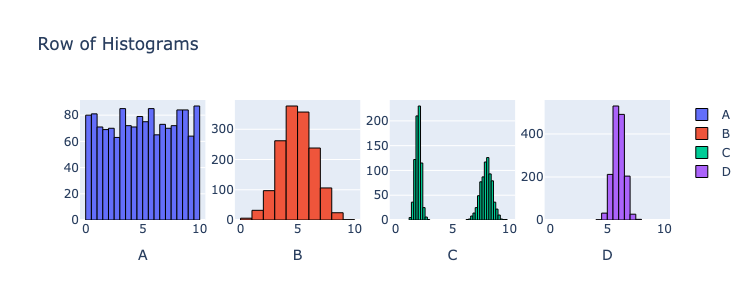

In [129]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

In [132]:
print('The sample mean of data1 is:', data1.mean())
print('The sample mean of data2 is:', data2.mean())
print('The sample mean of data3 is:', data3.mean())
print('The sample mean of data4 is:', data4.mean(), '\n')

print('The sample deviation of data1 is:', data1.std())
print('The sample deviation of data2 is:', data2.std())
print('The sample deviation of data3 is:', data3.std())
print('The sample deviation of data4 is:', data4.std(), '\n')

print('The sample variance of data1 is:', data1.var())
print('The sample variance of data2 is:', data2.var())
print('The sample variance of data3 is:', data3.var())
print('The sample variance of data4 is:', data4.var(), '\n')

print("""
4 (1). 
A and C have similar sample means approximately at 5 and similar variances at approximately 8.8

4 (2).
A and B have similar means, but their variances are much different. 

4 (3).
B and D have somewhat closest variances, but their means are not as close to eachother compared to the others.

4 (4).
A and D have different means and much different variances.
C and D have different means and much different variances.

""")

The sample mean of data1 is: 5.040521992824605
The sample mean of data2 is: 4.957611231016471
The sample mean of data3 is: 4.985238874855007
The sample mean of data4 is: 5.991698447790438 

The sample deviation of data1 is: 2.9146495162307215
The sample deviation of data2 is: 1.4717461053851824
The sample deviation of data3 is: 3.011731214793124
The sample deviation of data4 is: 0.5012126170986663 

The sample variance of data1 is: 8.49518180246398
The sample variance of data2 is: 2.1660365987164525
The sample variance of data3 is: 9.070524910159266
The sample variance of data4 is: 0.25121408753889424 


4 (1). 
Data1 and data3 have similar sample means approximately at 5 and similar variances at approximately 8.8

4 (2).
Data1 and data2 have similar means, but their variances are much different. 

4 (3).
Data2 and data4 have somewhat closest variances, but their means are not as close to eachother compared to the others.

4 (4).
data1 and data4 have different means and much different 

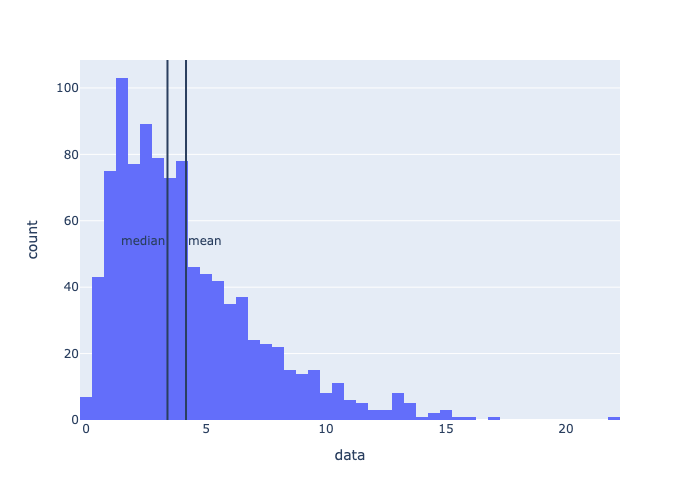

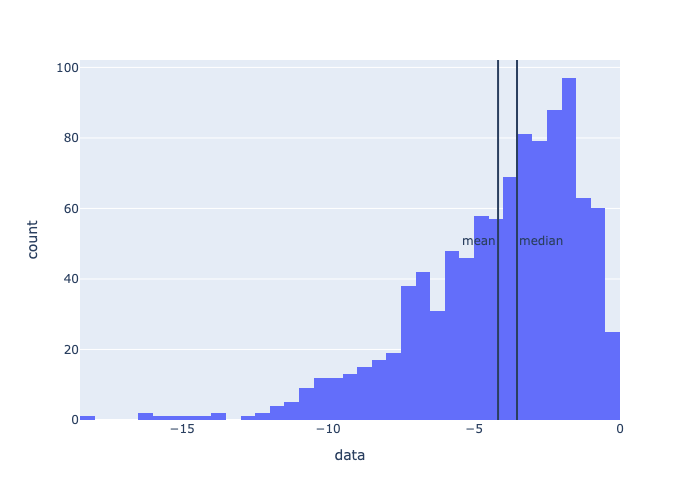

In [238]:
from scipy import stats
import pandas as pd
import numpy as np
import plotly.express as px
  
sample1 = stats.gamma(a=2,scale=2).rvs(size=1000)
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")
# USE `fig1.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

sample1_mean = sample1.mean()
sample1_median = np.quantile(sample1, [0.5]) # median

fig1.add_vline(sample1_mean, annotation_text="mean", annotation_position="right")
fig1.add_vline(np.median(sample1), annotation_text="median", annotation_position="left")


sample2 = -stats.gamma(a=2,scale=2).rvs(size=1000)
fig2 = px.histogram(pd.DataFrame({'data': sample2}), x="data")

fig2.add_vline(sample2.mean(), annotation_text="mean", annotation_position="left")
fig2.add_vline(np.median(sample2), annotation_text="median", annotation_position="right")


fig1.show(renderer="png")
fig2.show(renderer="png")

The first graph is skewed right and the second graph is skewed left. 

# 6

In [532]:
import pandas as pd
df = pd.read_csv('../Datasets/yearly-number-of-objects-launched-into-outer-space.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1175 entries, 0 to 1174
Data columns (total 4 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   Entity                                              1175 non-null   object
 1   Code                                                1033 non-null   object
 2   Year                                                1175 non-null   int64 
 3   Annual number of objects launched into outer space  1175 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 36.8+ KB


In [262]:
df.columns

Index(['Entity', 'Code', 'Year',
       'Annual number of objects launched into outer space'],
      dtype='object')

In [464]:
df.isna().sum()

Entity                                                  0
Code                                                  142
Year                                                    0
Annual number of objects launched into outer space      0
dtype: int64

In [502]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1033 entries, 1 to 1174
Data columns (total 4 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   Entity                                              1033 non-null   object
 1   Code                                                1033 non-null   object
 2   Year                                                1033 non-null   int64 
 3   Annual number of objects launched into outer space  1033 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 40.4+ KB


In [478]:
df[:]

,Entity,Code,Year,Annual number of objects launched into outer space
0,APSCO,NaN,2023,1
1,Algeria,DZA,2002,1
2,Algeria,DZA,2010,1
3,Algeria,DZA,2016,3
4,Algeria,DZA,2017,1
...,...,...,...,...
1170,World,OWID_WRL,2020,1274
1171,World,OWID_WRL,2021,1813
1172,World,OWID_WRL,2022,2478
1173,World,OWID_WRL,2023,2664


In [504]:
import plotly.express as px

In [506]:
df[(df['Year'] == 2023) & (df['Entity'] == 'World')]

,Entity,Code,Year,Annual number of objects launched into outer space
1173,World,OWID_WRL,2023,2664


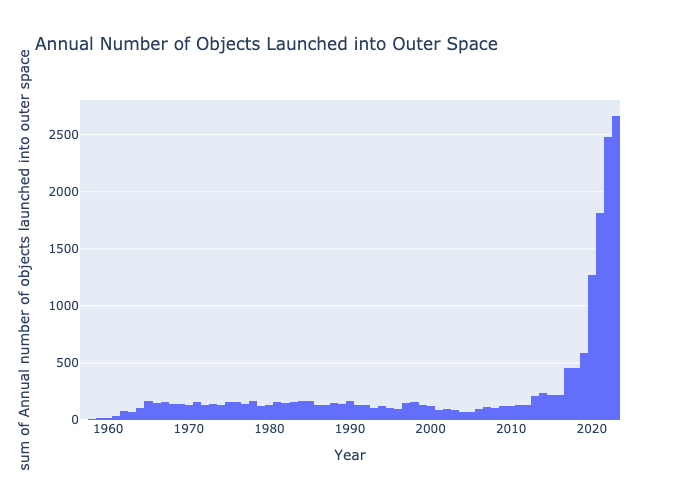

In [364]:
import pandas as pd
import plotly.express as px

# Load the dataset
df = pd.read_csv('../Datasets/yearly-number-of-objects-launched-into-outer-space.csv')

# Filter for entries where 'Entity' is 'World'
world_df = df[df['Entity'] == 'World']

# Group by Year and sum the launches
annual_launches = world_df.groupby('Year')['Annual number of objects launched into outer space'].sum().reset_index()

# Create the histogram
fig = px.histogram(annual_launches,
                   x='Year',
                   y='Annual number of objects launched into outer space',
                   title='Annual Number of Objects Launched into Outer Space',
                   nbins=annual_launches['Year'].nunique()  # Number of bins equals the number of unique years
)


# Show the histogram
fig.show(renderer="png")  # For GitHub and MarkUs submissions


In [512]:
# Filter out the 'World' entity from the DataFrame
filtered_df = df[df['Entity'] == 'World']

# Calculate the total number of objects launched into space, excluding the 'World' entity
total_launched = filtered_df['Annual number of objects launched into outer space'].sum()

# Print the total
print(f"Total number of objects launched into space: {total_launched}")


Total number of objects launched into space: 17263


In [516]:
# Group by 'Entity' and sum the total launches
print('Top 10 entities and the corresponding total number of objects they have launched into space.')
top_entities = df[df['Entity'] != 'World'].groupby('Entity')['Annual number of objects launched into outer space'].sum()

# Sort the results in descending order and get the top 10
# Convert the top entities Series to a DataFrame
top_10_entities_df = top_10_entities.reset_index()

# Rename the columns for better readability
top_10_entities_df.columns = ['Entity', 'Total Launched']

# Print the DataFrame
print(top_10_entities_df)


Top 10 entities and the corresponding total number of objects they have launched into space.
           Entity  Total Launched
0   United States            9632
1          Russia            3723
2           China            1051
3  United Kingdom             765
4           Japan             325
5          France             151
6           India             144
7         Germany             120
8          Canada             102
9      Luxembourg              86


Top 10 entities and the corresponding total number of objects they have launched into space:
                  Entity  Total Launched
0          United States            9632
1                 Russia            3723
2                  China            1051
3         United Kingdom             765
4                  Japan             325
5                 France             151
6                  India             144
7                Germany             120
8  European Space Agency             104
9                 Canada             102


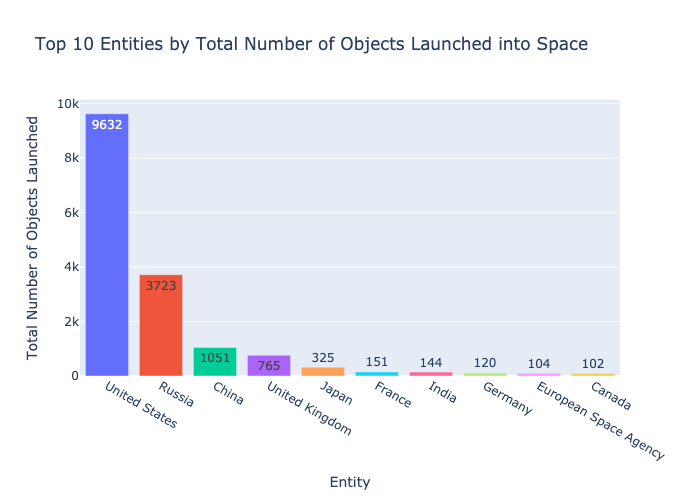

In [10]:
import pandas as pd
import plotly.express as px

# Load the dataset
df = pd.read_csv('../Datasets/yearly-number-of-objects-launched-into-outer-space.csv')

# Group by 'Entity' and sum the total launches, excluding the 'World' entity
top_entities = df[df['Entity'] != 'World'].groupby('Entity')['Annual number of objects launched into outer space'].sum()

# Sort the results in descending order and get the top 10
top_10_entities = top_entities.sort_values(ascending=False).head(10)

# Convert the top entities Series to a DataFrame
top_10_entities_df = top_10_entities.reset_index()

# Rename the columns for better readability
top_10_entities_df.columns = ['Entity', 'Total Launched']

# Print the DataFrame of the top 10 entities
print('Top 10 entities and the corresponding total number of objects they have launched into space:')
print(top_10_entities_df)

# Create the histogram
fig = px.bar(
    top_10_entities_df,
    x='Entity',
    y='Total Launched',
    title='Top 10 Entities by Total Number of Objects Launched into Space',
    color='Entity',
    text='Total Launched'  # Show total launched as text on bars
)

# Update layout for better visualization
fig.update_layout(
    xaxis_title='Entity',
    yaxis_title='Total Number of Objects Launched',
    showlegend=False  # Hide legend since it's redundant with labels
)

# Show the histogram
fig.show(renderer='png')


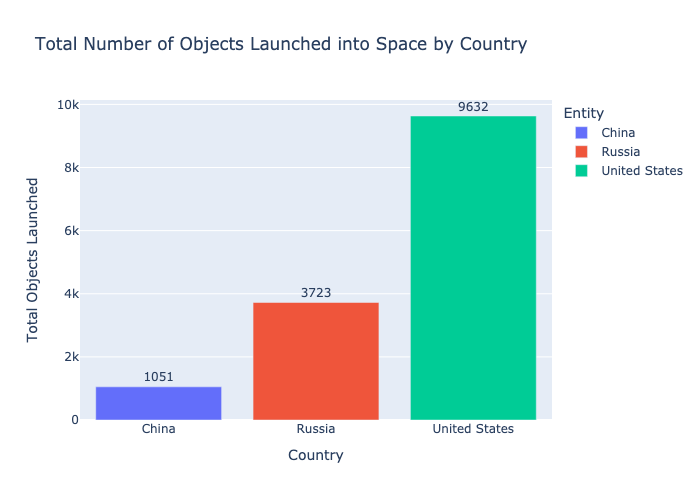

In [104]:
import pandas as pd
import plotly.express as px

# Load the dataset
df = pd.read_csv('../Datasets/yearly-number-of-objects-launched-into-outer-space.csv')

# Select the desired entities
selected_entities = ['China', 'United States', 'Russia']

# Filter for entries where 'Entity' is in the selected entities
filtered_df = df[df['Entity'].isin(selected_entities)]

# Group by Entity and sum the launches
annual_launches = filtered_df.groupby('Entity')['Annual number of objects launched into outer space'].sum().reset_index()

# Create the bar chart
fig = px.bar(
    annual_launches,
    x='Entity',
    y='Annual number of objects launched into outer space',
    title='Total Number of Objects Launched into Space by Country',
    color='Entity',
)

# Update layout to show values on bars
fig.update_traces(texttemplate='%{y}', textposition='outside')  # Show y values on bars
fig.update_layout(yaxis_title='Total Objects Launched',
                  xaxis_title='Country')

# Show the bar chart
fig.show(renderer='png')  # For GitHub and MarkUs submissions


In [568]:
df_usa = df[df['Entity'] == 'United States']
df_usa['Annual number of objects launched into outer space'].describe()
# left skewed 

count      66.000000
mean      145.939394
std       390.758075
min         7.000000
25%        25.250000
50%        35.000000
75%        77.750000
max      2166.000000
Name: Annual number of objects launched into outer space, dtype: float64

In [570]:
df_russia = df[df['Entity'] == 'Russia']
df_russia['Annual number of objects launched into outer space'].describe()
# right skewed

count     67.000000
mean      55.567164
std       40.304231
min        1.000000
25%       22.500000
50%       35.000000
75%       97.000000
max      124.000000
Name: Annual number of objects launched into outer space, dtype: float64

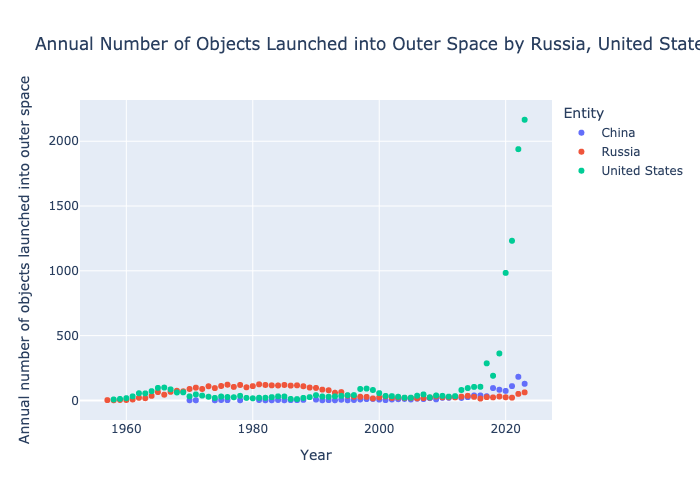

In [152]:
import pandas as pd
import plotly.express as px

# Assuming 'df' is your original DataFrame
selected_entities = ['Russia', 'United States', 'China']
filtered_df = df[df['Entity'].isin(selected_entities)]
# Create the scatter plot
fig = px.scatter(
    filtered_df,
    x='Year',
    y='Annual number of objects launched into outer space',
    color='Entity',
    title='Annual Number of Objects Launched into Outer Space by Russia, United States, and China',
    labels={'y': 'Number of Objects Launched'},
)

# Display the plot
fig.show(renderer='png')


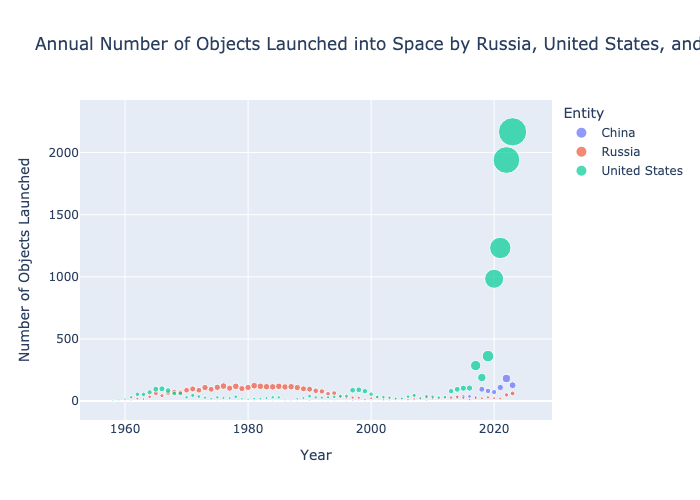

In [150]:
import pandas as pd
import plotly.express as px

# Filter the data for the selected entities
selected_entities = ['Russia', 'United States', 'China']
filtered_df = df[df['Entity'].isin(selected_entities)]

# Create a scatter plot showing each year's data
fig = px.scatter(
    filtered_df,
    x='Year',
    y='Annual number of objects launched into outer space',
    color='Entity',
    title='Annual Number of Objects Launched into Space by Russia, United States, and China',
    labels={'Annual number of objects launched into outer space': 'Number of Objects Launched'},
    size='Annual number of objects launched into outer space',  # Optional: size points by number of launches
    hover_name='Entity'
)

# Show the interactive scatter plot
fig.show(renderer='png')


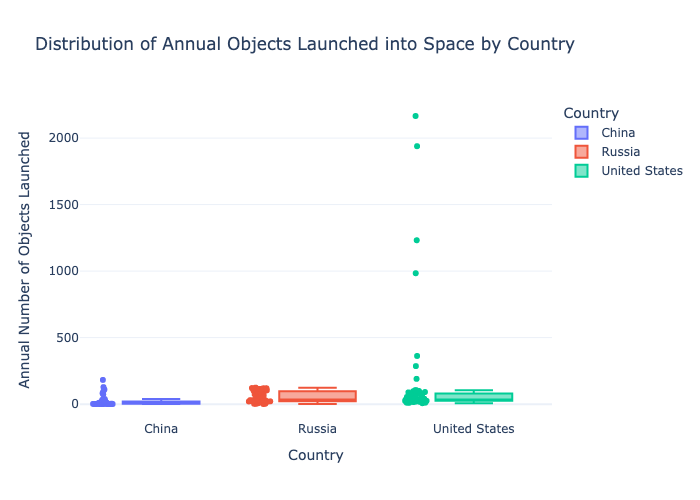

In [140]:
import pandas as pd
import plotly.express as px

# Load your dataset
df = pd.read_csv('../Datasets/yearly-number-of-objects-launched-into-outer-space.csv')

# Filter for selected entities
selected_entities = ['Russia', 'United States', 'China']
filtered_df = df[df['Entity'].isin(selected_entities)]

# Create the box plot
fig = px.box(
    filtered_df,
    x='Entity',  # Use 'Entity' for the x-axis
    y='Annual number of objects launched into outer space',  # Use the number of launches for the y-axis
    color='Entity',  # Color boxes by the entity
    title='Distribution of Annual Objects Launched into Space by Country',
    labels={
        'Annual number of objects launched into outer space': 'Number of Objects Launched',
        'Entity': 'Country'
    },
    points='all'  # Show all points as well for better visibility of data
)

# Update layout for aesthetics
fig.update_layout(
    xaxis_title='Country',
    yaxis_title='Annual Number of Objects Launched',
    template='plotly_white',  # Clean background
)

# Display the box plot
fig.show(renderer='png')


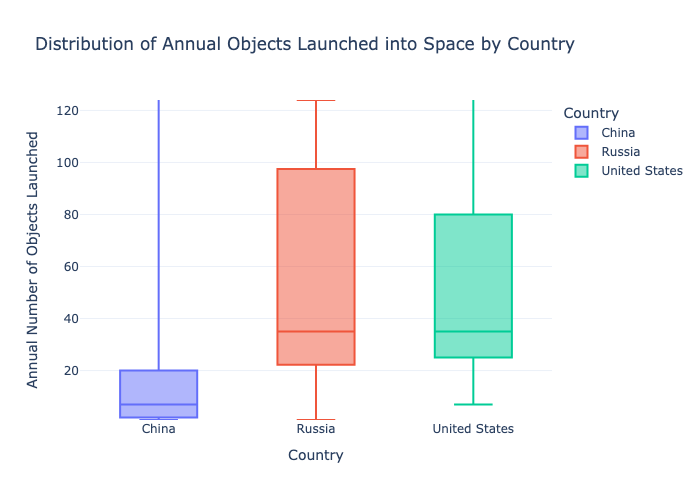

In [3]:
import pandas as pd
import plotly.express as px

# Load your dataset
df = pd.read_csv('../Datasets/yearly-number-of-objects-launched-into-outer-space.csv')

# Filter for selected entities
selected_entities = ['Russia', 'United States', 'China']
filtered_df = df[df['Entity'].isin(selected_entities)]

# Create the box plot without data points
fig = px.box(
    filtered_df,
    x='Entity',  # Use 'Entity' for the x-axis
    y='Annual number of objects launched into outer space',  # Use the number of launches for the y-axis
    color='Entity',  # Color boxes by the entity
    title='Distribution of Annual Objects Launched into Space by Country',
    labels={
        'Annual number of objects launched into outer space': 'Number of Objects Launched',
        'Entity': 'Country'
    },
    points=False  # Do not show individual data points
)

# Set y-axis limits to zoom in on the boxes
y_min = filtered_df['Annual number of objects launched into outer space'].quantile(0.05)  # 5th percentile
y_max = filtered_df['Annual number of objects launched into outer space'].quantile(0.95)  # 95th percentile
fig.update_yaxes(range=[y_min, y_max])

# Update layout for aesthetics
fig.update_layout(
    xaxis_title='Country',
    yaxis_title='Annual Number of Objects Launched',
    template='plotly_white',  # Clean background
)

# Display the box plot
fig.show(renderer='png')


In [18]:
for entity in selected_entities:
    print(entity, '\n', filtered_df[filtered_df['Entity'] == entity].describe())


Russia 
               Year  Annual number of objects launched into outer space
count    67.000000                                          67.000000 
mean   1990.000000                                          55.567164 
std      19.485037                                          40.304231 
min    1957.000000                                           1.000000 
25%    1973.500000                                          22.500000 
50%    1990.000000                                          35.000000 
75%    2006.500000                                          97.000000 
max    2023.000000                                         124.000000 
United States 
               Year  Annual number of objects launched into outer space
count    66.000000                                          66.000000 
mean   1990.500000                                         145.939394 
std      19.196354                                         390.758075 
min    1958.000000                                  

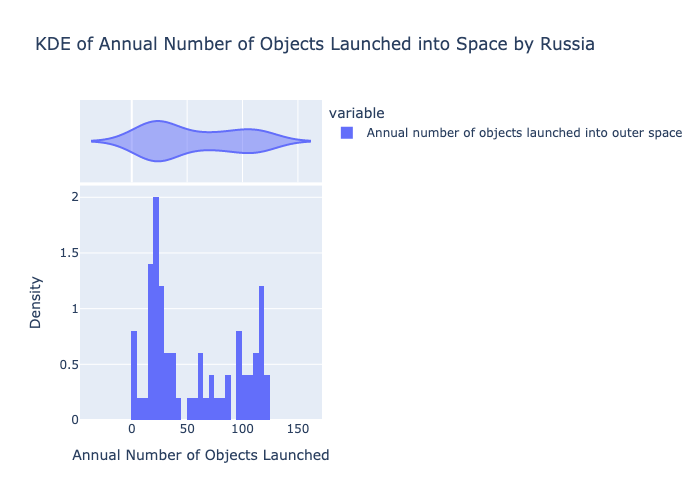

In [16]:
import pandas as pd
import plotly.express as px

# Load the dataset
df = pd.read_csv('../Datasets/yearly-number-of-objects-launched-into-outer-space.csv')

# Filter the DataFrame for entries where 'Entity' is Russia
russia_df = df[df['Entity'] == 'Russia']

# Extract the launch data for Russia
russia_launches = russia_df['Annual number of objects launched into outer space']

# Create the KDE plot for Russia
fig = px.histogram(
    russia_launches,
    nbins=30,  # Adjust the number of bins for smoothness
    marginal='violin',  # Adds a KDE overlay with a violin plot
    title='KDE of Annual Number of Objects Launched into Space by Russia',
    histnorm='density',  # Normalize histogram to display density
)

# Update layout for a clearer plot
fig.update_layout(
    xaxis_title='Annual Number of Objects Launched',
    yaxis_title='Density'
)

# Show the KDE plot
fig.show(renderer='png')


# 1 
## Summary of Exchanges

https://chatgpt.com/share/66f4dad7-a9fc-8011-90f3-ccdf2350e21d

Dataset Introduction:
You introduced an interesting dataset, specifically the penguins dataset, and shared the method for loading it using Pandas.
Plotting with Plotly:
You discussed using add_hline() and add_vline() to mark the mean and median of flipper_length_mm for different species in histograms. You encountered an error related to missing positional arguments and later sought ways to label these lines effectively.
Indexing and Legend Creation:
You asked how to index into the flipper_length_mm for one of the three species and inquired about efficiently labeling the lines in the legend. We discussed how to create a legend to indicate what each line represents, focusing on labeling using color and line style.
Interquartile Range (IQR) and Standard Deviation:
You clarified the calculation of IQR and discussed its comparison to standard deviation ranges. You inquired about whether the IQR range is typically larger than the 2 standard deviation range and the methodology for determining the lower and upper bounds of the IQR.
Hover Information for Vertical Lines:
You expressed interest in showing the values of vertical lines only when hovering over them rather than displaying them as annotations. We discussed using hovertemplate in combination with scatter traces to achieve this effect.
Adding Legends for Rectangles:
Finally, you asked how to create a legend for the add_vrect() shapes in your plot. We discussed the use of add_shape() to create rectangles and how to add a dummy scatter trace for the legend entry.
This summary captures the essence of our discussions, focusing on your questions and the solutions provided regarding data visualization using Plotly and the analysis of the penguins dataset. If you need any adjustments or additional details, feel free to let me know!

# 2
## Summary of Exchanges

https://chatgpt.com/share/66f4dae6-5a98-8011-8a8f-49d4d41baba5

Initial Dataset Exploration: The conversation began with the user expressing interest in the penguins dataset, which was loaded using Pandas.
Initial Visualization Request: The user requested a visualization that included histograms of flipper lengths for each species using Seaborn kernel density estimation (KDE) plots.
Troubleshooting and Corrections: The user encountered issues with the plot generation, leading to adjustments in the code to ensure only one graph was produced with the desired KDE plots.
New Approach with Violin Plot: The user requested a complete rework of the visualization, resulting in the creation of a violin plot that combined the distributions of flipper lengths for each species.
Customization of the Violin Plot: The user then asked for horizontal lines to indicate the mean, median, and mode. Specific color coding was requested for each species, along with the removal of mode lines for clarity.
Refinement of Visualization: After discussing the plot, the user modified it to include only the mean and median lines, changing their styles and colors for each species.
Addition of Standard Deviation Ranges: The user requested the addition of shaded rectangles representing the range defined by two standard deviations from the mean for each species. Specific colors for each species were specified.
Final Adjustments: The final version of the code was provided, including the shaded rectangles for the 2nd standard deviation ranges while retaining previous customizations.
If you need any further adjustments or specific details added to the summary, feel free to let me know!

# 3
https://chatgpt.com/share/66f4db35-bc6c-8011-8062-6b2a7dd258bf

# 4 
https://chatgpt.com/share/66f4db52-5810-8011-96ae-f5016027bf12

# 5
https://chatgpt.com/share/66f4db68-5994-8011-b0ea-956424af4f01

# 6 

Here's a summary of our exchanges regarding your data analysis and visualization tasks related to the dataset on the annual number of objects launched into outer space:

Summary of Interactions
Data Visualization:

We discussed how to use plotly.express to create various types of visualizations, including histograms and box plots, for the dataset.
You expressed a preference for showing overlapping bars in histograms to represent annual launches by different entities.
Data Filtering:

You filtered the dataset to focus on specific entities, such as China, the United States, and Russia, and attempted to create visualizations based on that filtered data.
We explored how to exclude the "World" entity when calculating the total number of objects launched into space.
Summarizing Data:

We calculated the total number of objects launched into space and discussed methods to find the top 10 entities responsible for the most launches.
You received guidance on how to format the output to display the top entities more clearly, without extraneous labels.
Issues Encountered:

You encountered several errors related to plotting, indexing, and data manipulation, which we addressed step by step.
We resolved issues related to the display of the histogram and ensured that all relevant years were represented.
Code Examples:

I provided code snippets for filtering data, summing values, and creating visualizations using plotly.express.
The code examples included how to adjust the x-axis labels, calculate totals while excluding specific entities, and print summarized results in a clear format.

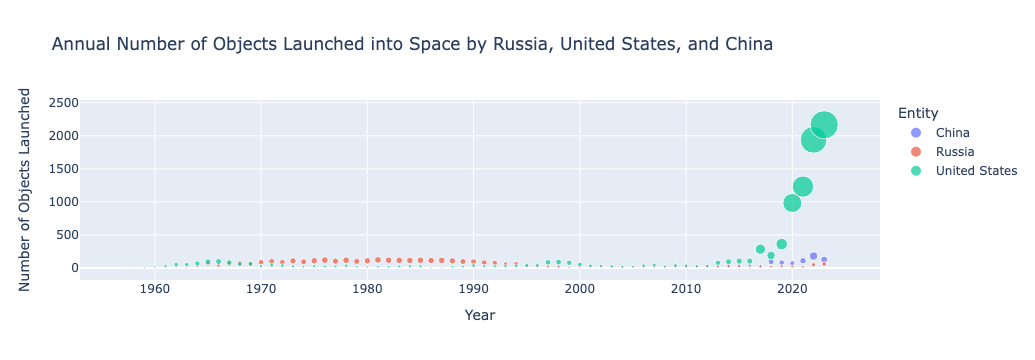

In [118]:
import pandas as pd
import plotly.express as px

# Filter the data for the selected entities
selected_entities = ['Russia', 'United States', 'China']
filtered_df = df[df['Entity'].isin(selected_entities)]

# Create a scatter plot showing each year's data
fig = px.scatter(
    filtered_df,
    x='Year',
    y='Annual number of objects launched into outer space',
    color='Entity',
    title='Annual Number of Objects Launched into Space by Russia, United States, and China',
    labels={'Annual number of objects launched into outer space': 'Number of Objects Launched'},
    size='Annual number of objects launched into outer space',  # Optional: size points by number of launches
    hover_name='Entity'
)

# Show the interactive scatter plot
fig.show()
